# Mini-Project Number 1.  What Breast cancer will recur? 

### Import all the necessary libraries:

In [464]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

### import the data:

In [465]:
data = pd.read_csv('wpbc.data', names= range(1,36), index_col= False, na_values="?")

### The describe of the data:

1. Number of instances: 198

2. Number of attributes: 34 (ID, outcome, 32 real-valued input features)

3. Attribute information <br>
    1) ID number <br>
    2) Outcome (R = recur, N = nonrecur) <br>
    3) Time (recurrence time if field 2 = R, disease-free time if field 2 = N) <br>
    4-33) Ten real-valued features are computed for each cell nucleus: <br>
    
        a) radius (mean of distances from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry 
        j) fractal dimension ("coastline approximation" - 1)

### View the first fields in the table:

In [466]:
data.head(7)

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
5,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0.0
6,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.1213,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,NaN


### searching for null data:

In [467]:
data.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    4
dtype: int64

add: explain what to delete and why we dcieded to delete like that??????????????????

In [468]:
data.dropna(inplace=True, axis=0, how="any")

### Label encoding of the target:
R = 1 = recurrent 

N = -1 = nonrecurrent

In [469]:
data[2].replace({'N':-1,'R':1},inplace=True)

Leave out the first column (participant’s ID) and the third column (the recurrence time) from the data.

In [470]:
data = data.drop([1, 3], axis = 1)
data

,2,4,5,6,7,8,9,10,11,12,...,26,27,28,29,30,31,32,33,34,35
0,-1,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,-1,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,-1,14.72,25.26,99.28,657.5,0.11740,0.21120,0.17290,0.09465,0.2079,...,111.60,814.8,0.14640,0.5352,0.5655,0.19740,0.3778,0.11320,1.7,21.0
193,-1,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,-1,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,-1,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0


In [471]:
# fig = plt.figure(figsize=(25,15))
# sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
# plt.title('Correlation Between All Features', size=20)
# plt.show()

In [472]:
def cm_analysis(y_true, y_pred, labels, figsize=(7,6)):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()

### Features Scaling & Train-Test Split:

In [473]:
scaler = StandardScaler()

X = scaler.fit_transform(data.iloc[:, 1:].values)  
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = random_state )

freqs = pd.DataFrame({"Training dataset": [(y_train == 1).sum(),(y_train == -1).sum()],
                      "Test dataset": [(y_test == 1).sum(),(y_test == -1).sum()],
                      "Total": [(y_train == 1).sum()+(y_test == 1).sum(),(y_train == -1).sum()+(y_test == -1).sum()]},
                     index=["Recurrent", "Nonrecurrent"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Recurrent,28,18,46
Nonrecurrent,101,47,148


In [474]:
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(32,18,8), (40, 30, 40), (100,50,100),(40,32,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [476]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(40, 32, ), random_state=1)
clf.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(40, 32), random_state=1)

### The prediction:

In [477]:
y_predict = clf.predict(X_test)

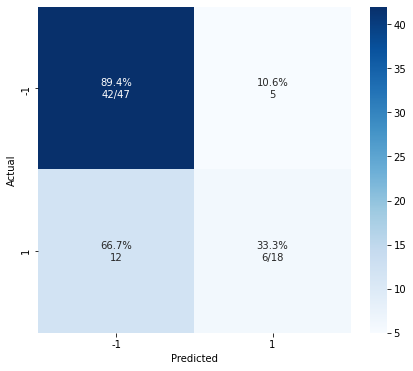

In [478]:
cm_analysis(y_test, y_predict, clf.classes_)

In [479]:
print("Accuracy of BP (split): ",metrics.accuracy_score(y_test, y_predict))
print("Accuracy of BP (cross-validation): ",cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean())

Accuracy of BP (split):  0.7384615384615385


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of BP (cross-validation):  0.7322916666666667


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [480]:
print("Standart Deviation of BP (cross-validation): ",cross_val_score(clf, X, y, cv=3, scoring='accuracy').std())

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Standart Deviation of BP (cross-validation):  0.049401751568350666


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [481]:
confusion = metrics.confusion_matrix(y_test, y_predict)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))


True Positives (TP): 6
True Negatives (TN): 42
False Positives (FP): 5
False Negarives (FN): 12
Classification Error: 0.26153846153846155
Sensitivity: 0.3333333333333333
Specificity: 0.8936170212765957
